# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [207]:
#install spacy in the current conda environment
!pip install spacy


In [208]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.1 MB/s eta 0:00:0000:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [209]:
pip show spacy


Name: spacy
Version: 3.8.3
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /opt/anaconda3/envs/is310/lib/python3.9/site-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [210]:
import sys
print(sys.executable)


/opt/anaconda3/envs/is310/bin/python


In [211]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy

language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [212]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [213]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [214]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [215]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [216]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [217]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [218]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [219]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [220]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

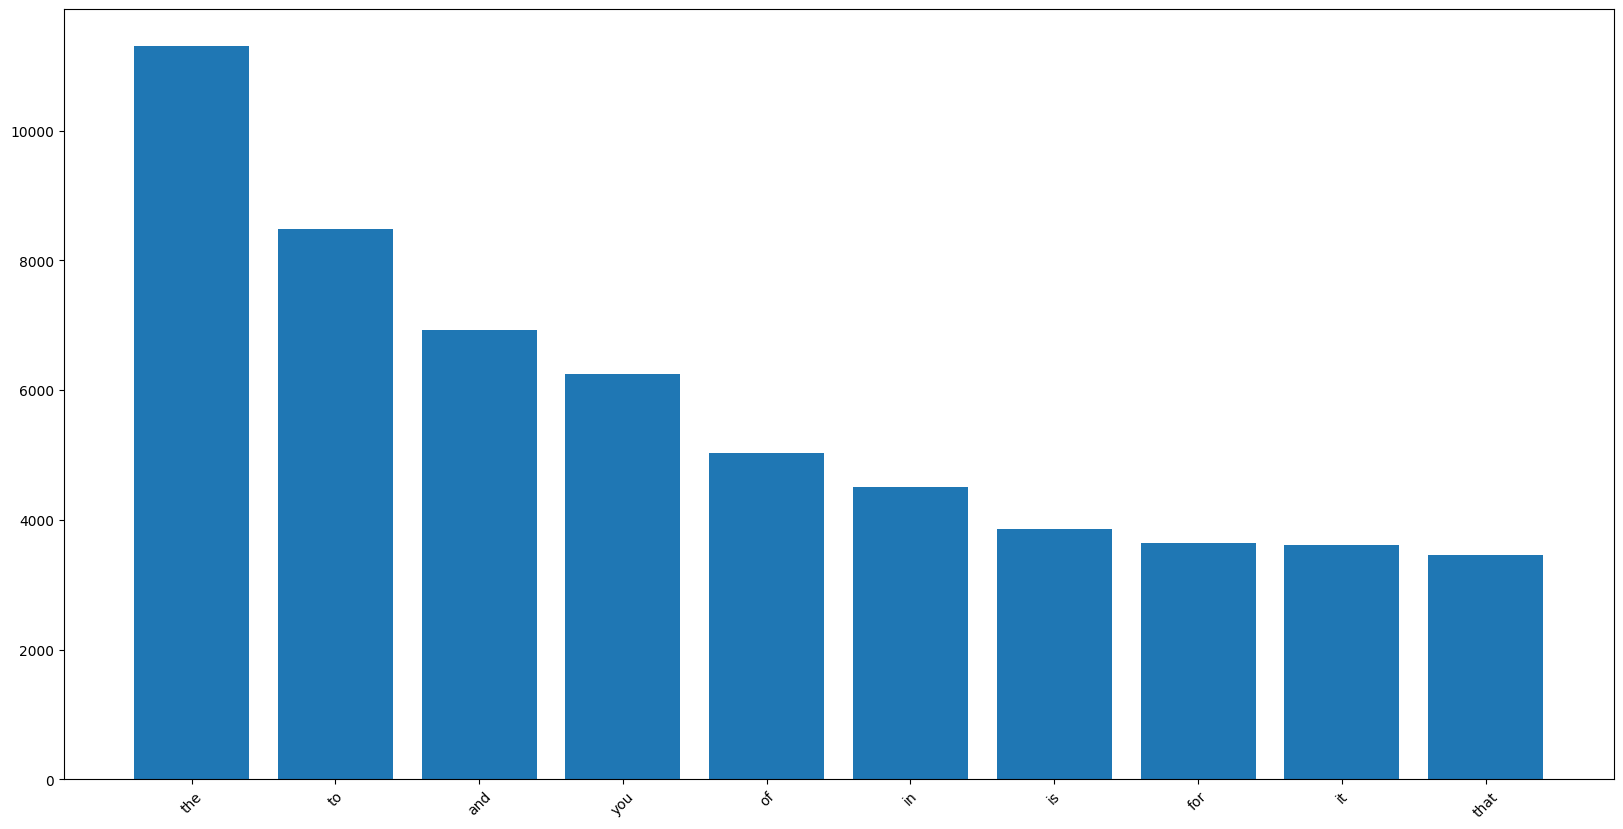

In [222]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: 

The words in the plot are all filler words, they do not provide any useful information, it would be helpful if these were descriptive words.

#### Lemmatization and stopword removal

In [223]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [224]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [225]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [226]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [227]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [228]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

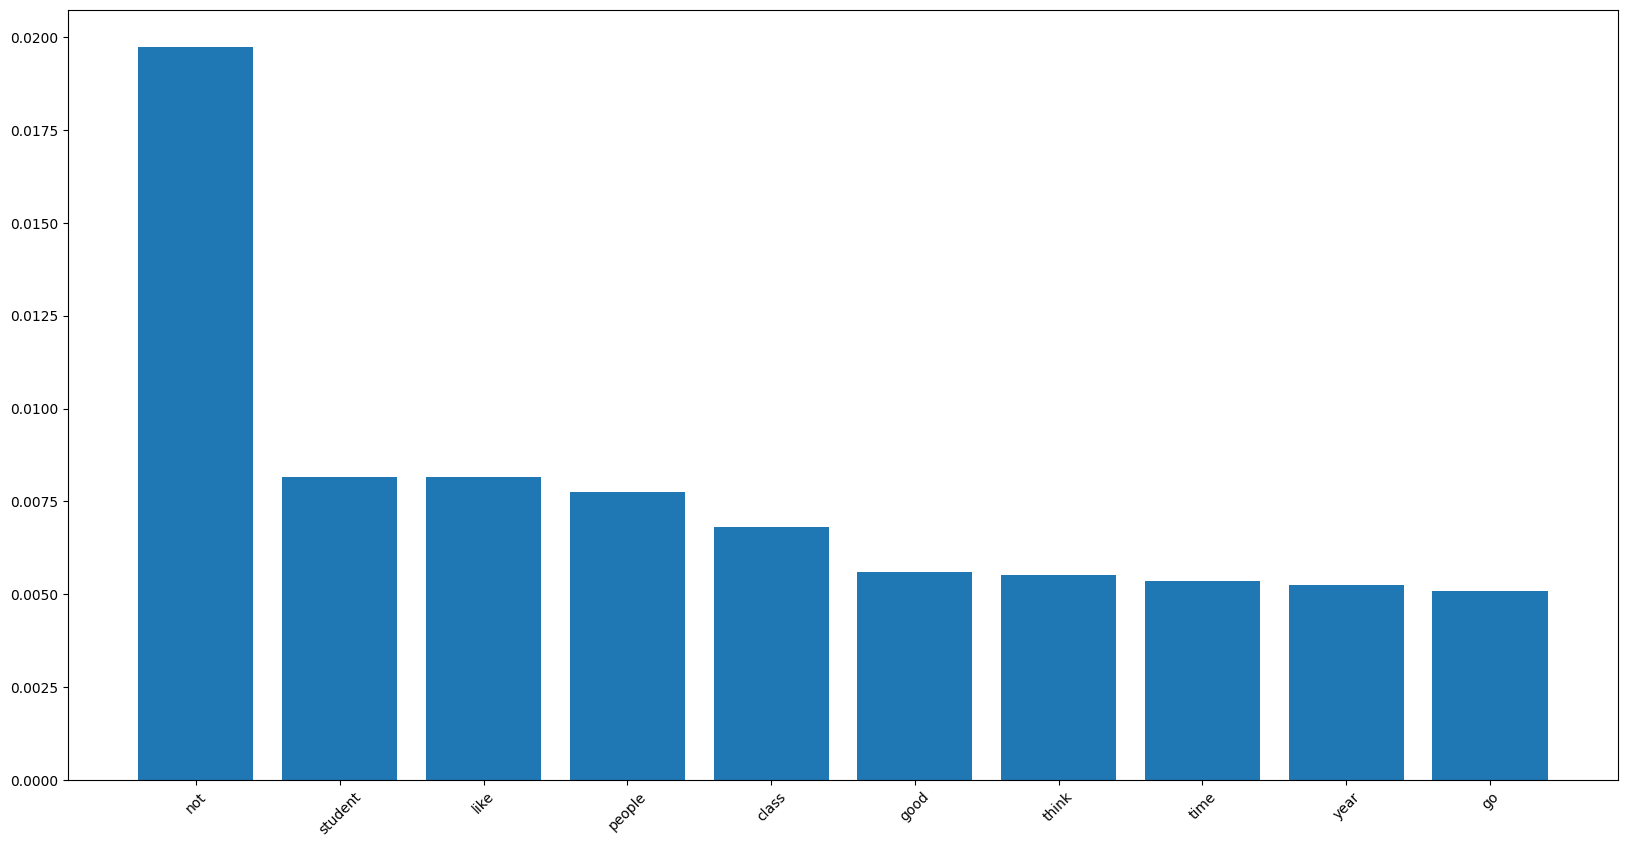

In [229]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [230]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

np.float64(4.1400153180566765e-05)

In [231]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

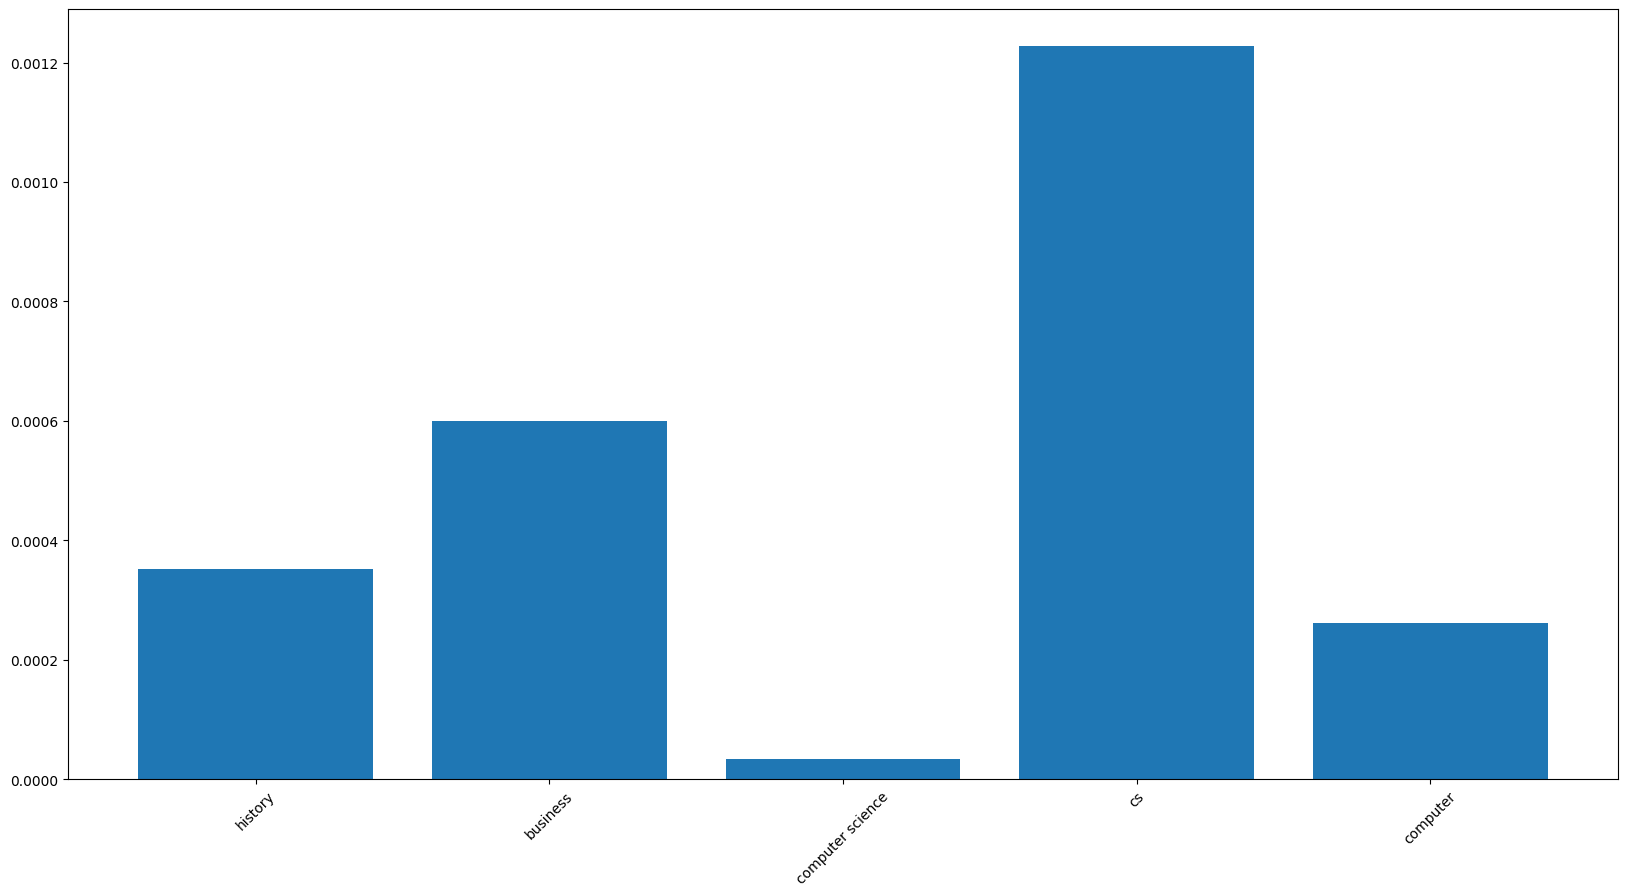

In [232]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [233]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

In [234]:
plot_list2=word_counts[["hard", "easy", "bad", "good", "people"]]
plot_list2

hard      0.001518
easy      0.001780
bad       0.001766
good      0.005603
people    0.007756
dtype: float64

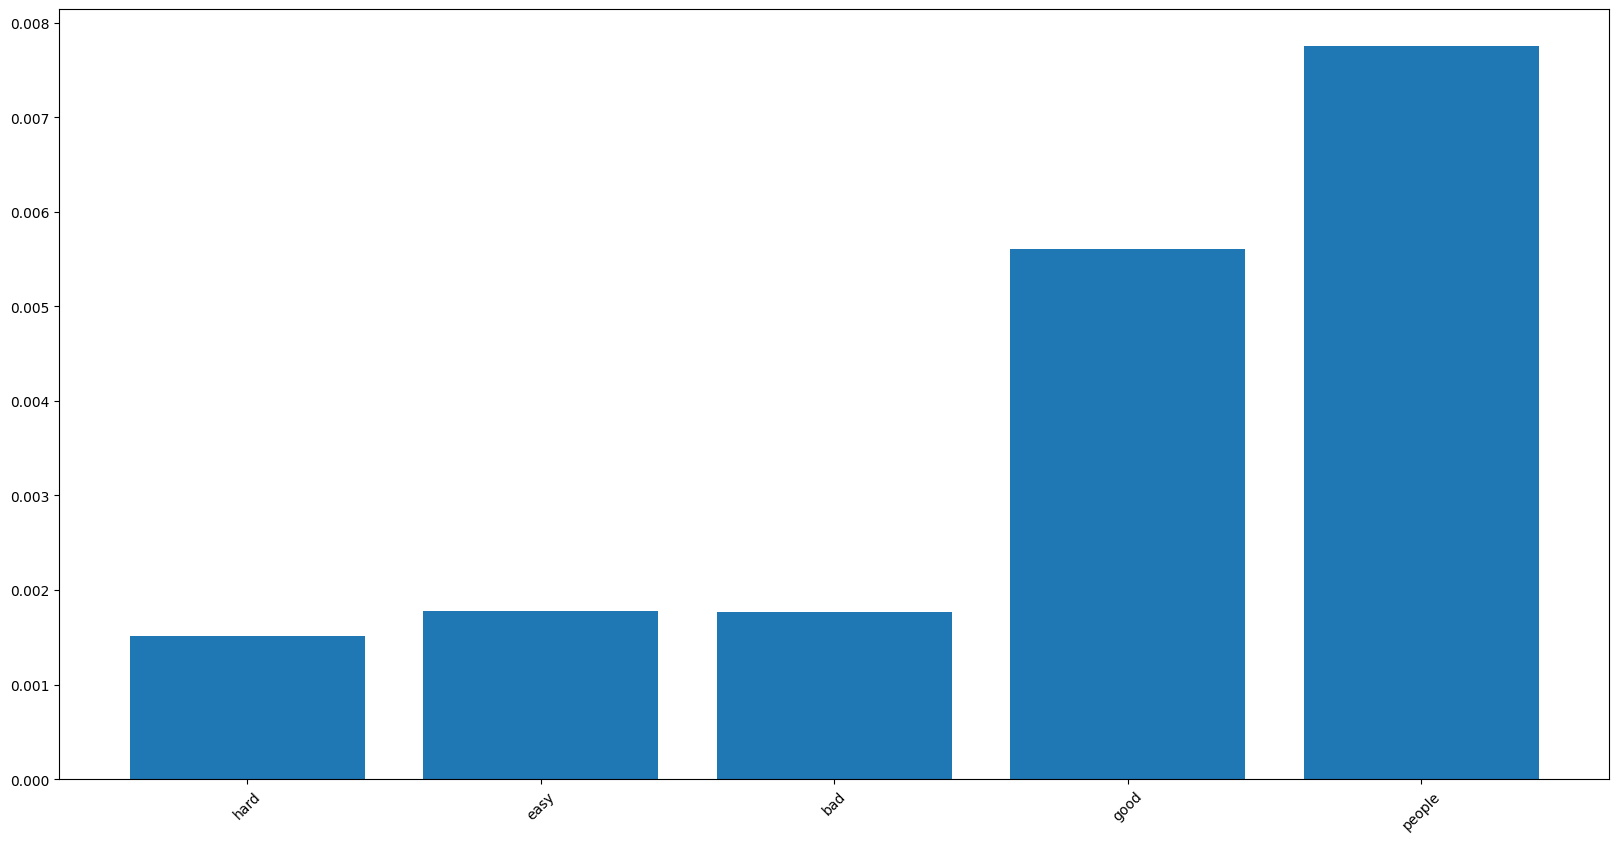

In [235]:
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [236]:
uiuc=pd.read_csv("uiuc.csv")
uiuc

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3


In [237]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [238]:
uiuc['cleaned_text2'] = uiuc['text'].apply(clean)

In [239]:
uiuc["cleaned_text2"][0]

'have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture'

In [240]:
uiuc["text"][0]

'Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself\xa0\n\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture'

In the mich reddit the first comment is about a restaurant but in the uiuc reddit the first comment is about a professor.

In [241]:
vectorizer2 = CountVectorizer()
bag_of_words2 = vectorizer2.fit_transform(uiuc['cleaned_text2'])

In [242]:
bag_of_words2

<4725x10109 sparse matrix of type '<class 'numpy.int64'>'
	with 98566 stored elements in Compressed Sparse Row format>

In [243]:
bow_df2 = pd.DataFrame(bag_of_words2.toarray(), columns=vectorizer2.get_feature_names_out())
bow_df2

,aa,aaa,aaaaah,aaabb,ab,abandoned,abcc,abide,abilities,ability,...,zombie,zone,zones,zoo,zoom,zoomed,봉사를,세계로,숭실,진리와
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The UIUC reddit has Korean letters in it while the Michigan one does not. 

In [244]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts2 = bow_df2.sum()
#we can sort the values to see the most common words
word_counts2 = word_counts2.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts2

the                                                                                                       4613
to                                                                                                        3629
and                                                                                                       2973
you                                                                                                       2551
of                                                                                                        1854
                                                                                                          ... 
httpswwwwciacomnewsraresquirrelmemorializedonuoficampus                                                      1
httpswwwurbanaillinoisussitesdefaultfilesattachmentslandlordtenantpdf                                        1
httpswwwuoficreditunionorgcreditcreditcardshttpswwwuoficreditunionorgcreditcreditcards                       1
h

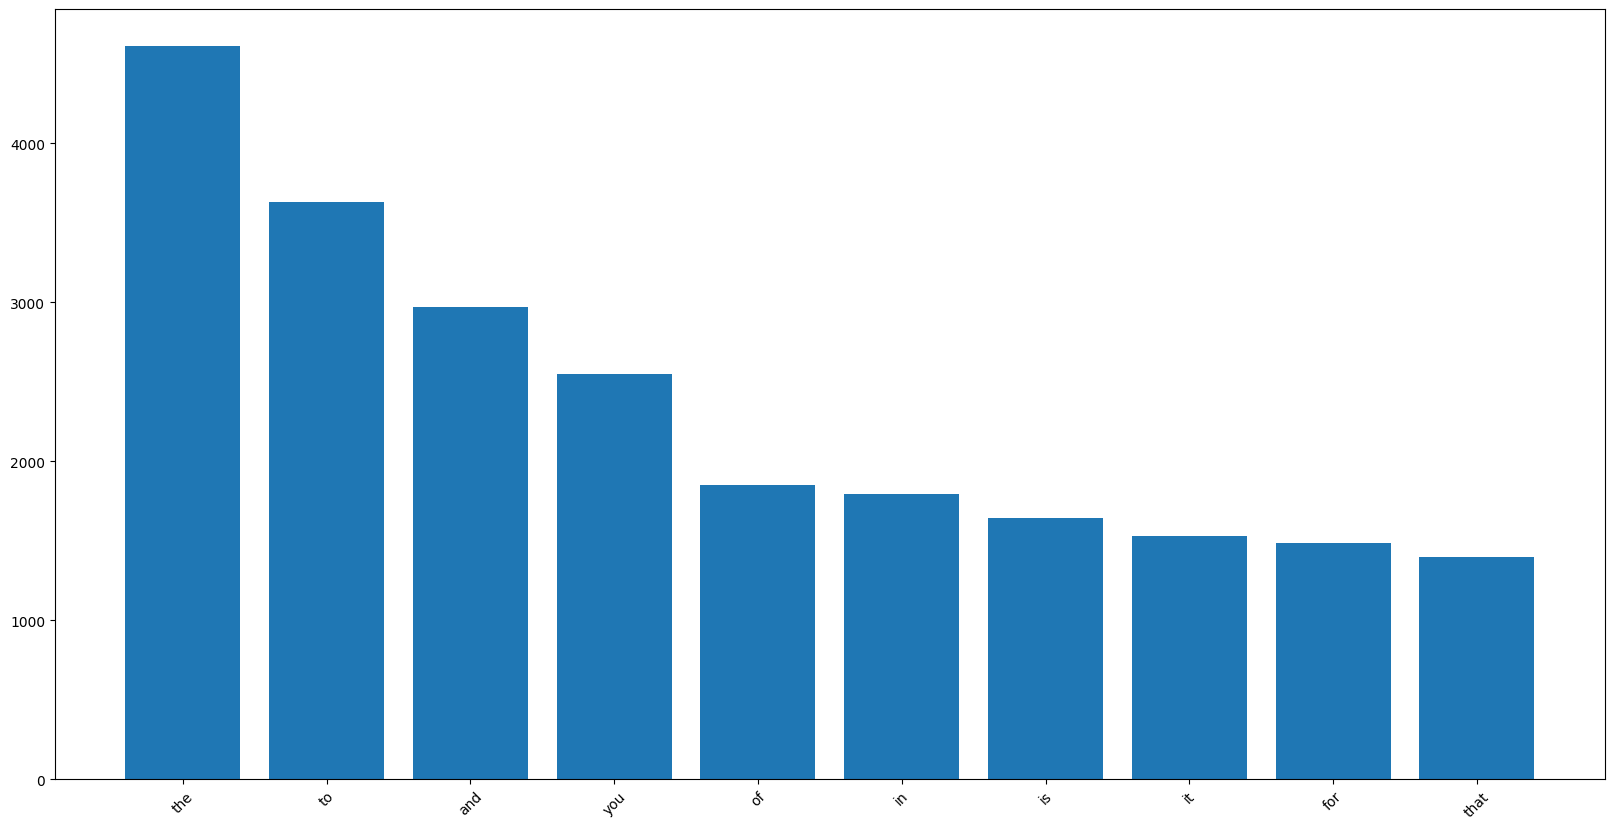

In [245]:
word_counts2 = word_counts2.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts2.index, word_counts2.values)
plt.xticks(rotation=45)
plt.show()

In [246]:
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [247]:
print(uiuc.columns)


Index(['Unnamed: 0', 'date', 'post_votes', 'text', 'user', 'com_votes',
       'cleaned_text2'],
      dtype='object')


In [248]:
uiuc['lemmatized_text2'] = uiuc['cleaned_text2'].apply(lemmatize)

In [249]:
vectorizer2 = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words2 = vectorizer2.fit_transform(uiuc['lemmatized_text2'])

In [250]:
bag_of_words2

<4725x3882 sparse matrix of type '<class 'numpy.int64'>'
	with 49389 stored elements in Compressed Sparse Row format>

In [251]:
bow_df2 = pd.DataFrame(bag_of_words2.toarray(), columns=vectorizer2.get_feature_names_out())
word_counts2 = bow_df2.sum()
word_counts2 = word_counts2.sort_values(ascending=False)
word_counts2

not          1205
like          534
people        481
good          389
time          376
             ... 
mask sick       3
marville        3
markdown        3
maps            3
luckily         3
Length: 3882, dtype: int64

In [252]:
word_counts2 = word_counts2 / word_counts2.sum()

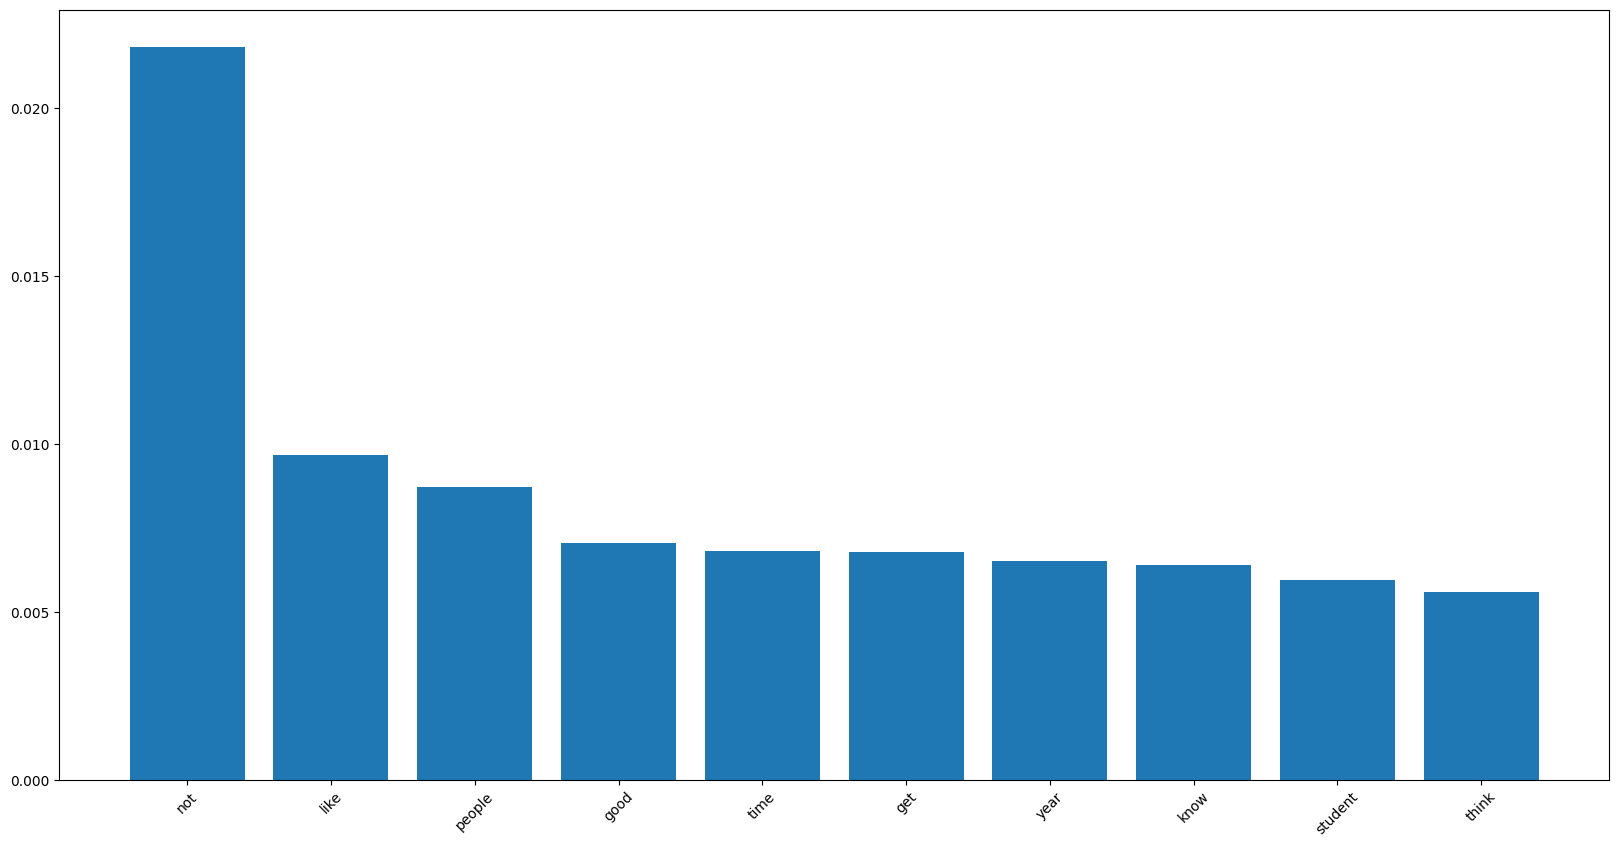

In [253]:
plot_list3 = word_counts2.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list3.index, plot_list3.values)
plt.xticks(rotation=45)
plt.show()

In [254]:
plot_list3=word_counts2[["history", "business", "computer science", "cs", "computer"]]
plot_list3

history             0.000344
business            0.000543
computer science    0.000054
cs                  0.001413
computer            0.000290
dtype: float64

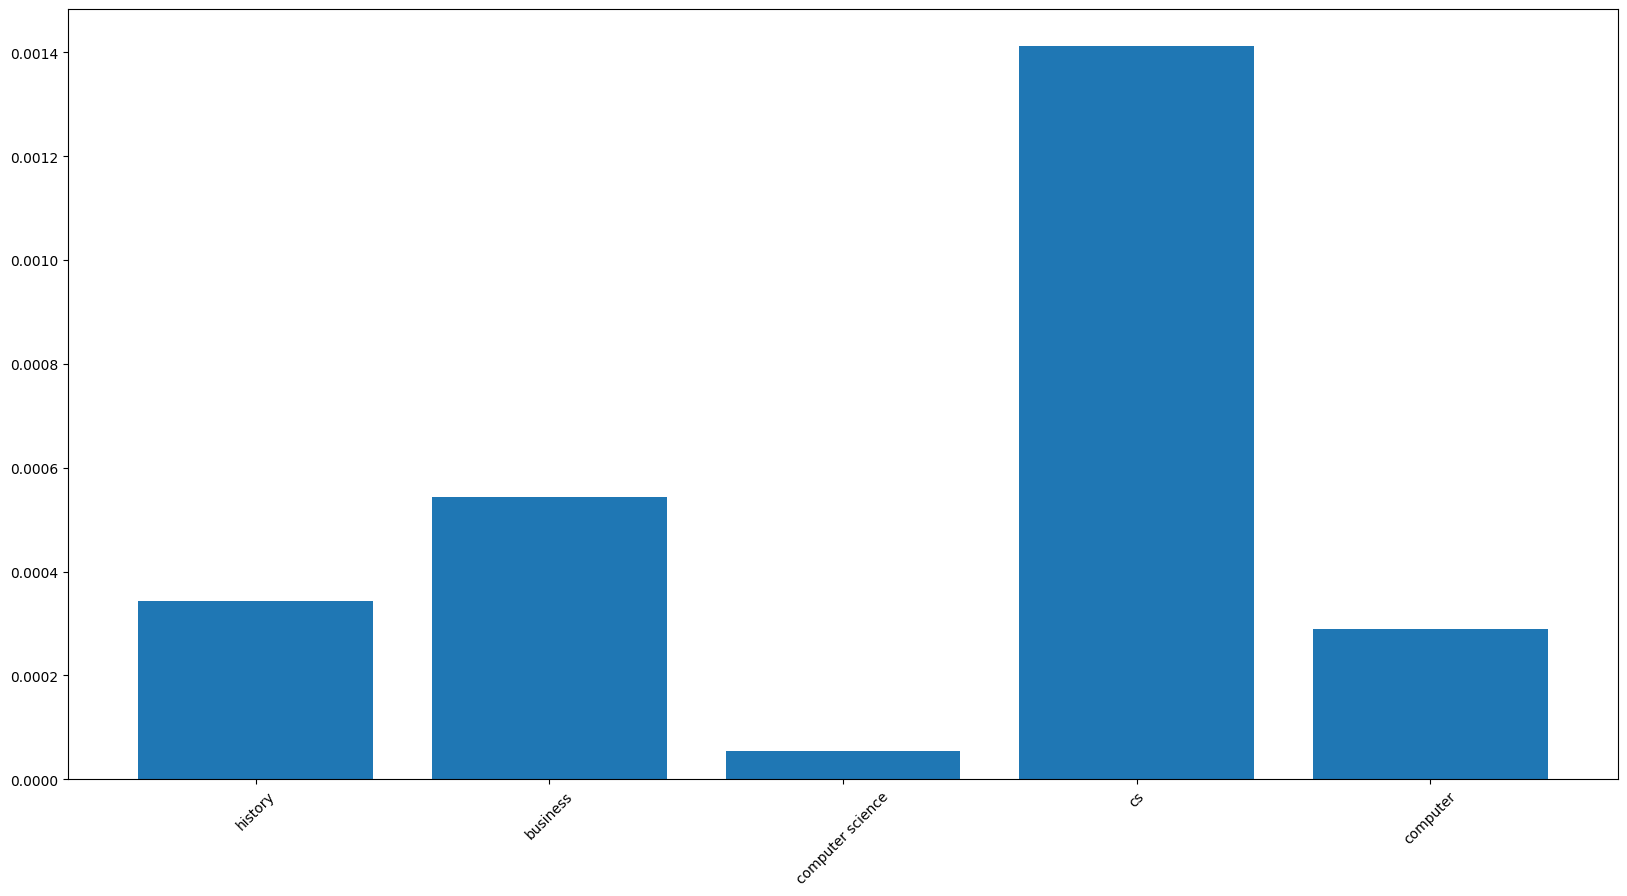

In [255]:

plt.figure(figsize=(20,10))
plt.bar(plot_list3.index, plot_list3.values)
plt.xticks(rotation=45)
plt.show()

In [256]:
plot_list4=word_counts2[["hard", "easy", "bad", "good", "people"]]
plot_list4

hard      0.001793
easy      0.001340
bad       0.002481
good      0.007046
people    0.008712
dtype: float64

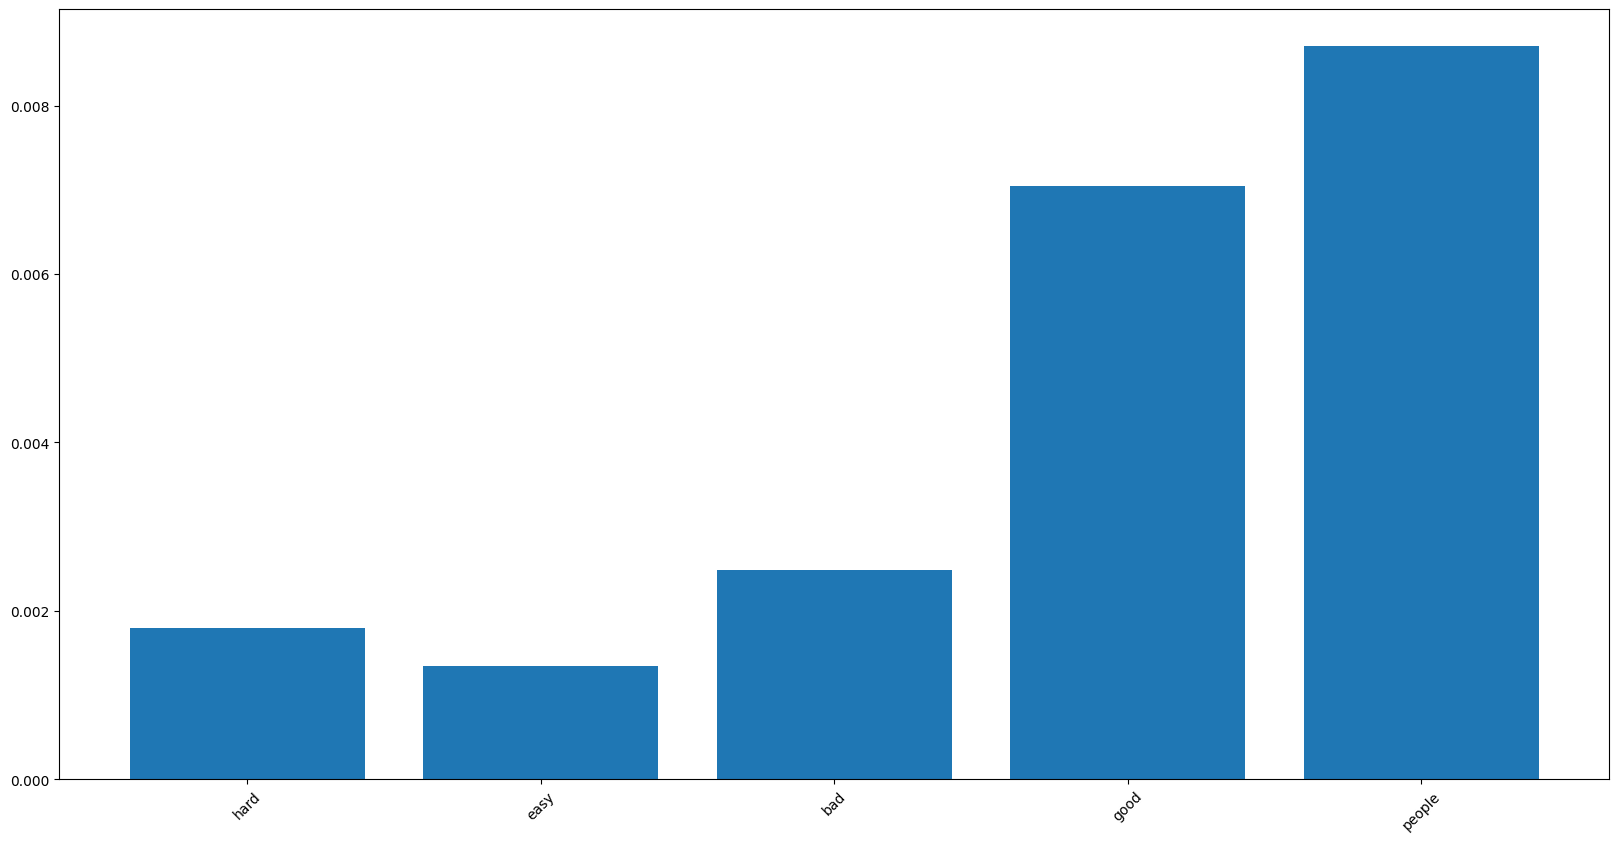

In [257]:
plt.figure(figsize=(20,10))
plt.bar(plot_list4.index, plot_list4.values)
plt.xticks(rotation=45)
plt.show()

The Michigan reddit says word "easy" more times than the UIUC reddit. 

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [258]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])
data

,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1
...,...,...,...,...,...,...,...
3089,3089,2024-08-22 01:06:43,5,One option might be applying as a transfer stu...,randwyck,1,0
2046,2046,2024-08-27 03:18:08,1,Can you dm me where you're finding it at? Ever...,RyntheRabbit,1,0
1230,1230,2024-08-29 20:48:35,0,Just register for real online…..,Glum-Suggestion-6033,9,0
1553,1553,2024-08-28 06:25:01,143,You grow to love a good summer thunderstorm. W...,Polarisin,106,0


In [259]:
#clean and lemmatize the data csv

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [260]:
data['cleaned_text'] = data['text'].apply(clean)
data


,Unnamed: 0,date,post_votes,text,user,com_votes,label,cleaned_text
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1,have the same professor and in lecture he did ...
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1,do you find it helpful to still go to the lect...
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1,have you tried emailing university housing to ...
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1,purchasing illini cash should get you added to...
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1,just did thanks for the suggestion it hadnt oc...
...,...,...,...,...,...,...,...,...
3089,3089,2024-08-22 01:06:43,5,One option might be applying as a transfer stu...,randwyck,1,0,one option might be applying as a transfer stu...
2046,2046,2024-08-27 03:18:08,1,Can you dm me where you're finding it at? Ever...,RyntheRabbit,1,0,can you dm me where youre finding it at everyw...
1230,1230,2024-08-29 20:48:35,0,Just register for real online…..,Glum-Suggestion-6033,9,0,just register for real online
1553,1553,2024-08-28 06:25:01,143,You grow to love a good summer thunderstorm. W...,Polarisin,106,0,you grow to love a good summer thunderstorm wh...


In [261]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [263]:
#train a logistic regression model using the bag of words features as X and the label column as y
X = bag_of_words  
y = data["label"]

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [265]:
model = LogisticRegression(solver="liblinear") 
model.fit(X, y)

LogisticRegression(solver='liblinear')

In [266]:
y_pred = model.predict(X)

In [267]:
#report the accuracy of the model
accuracy = accuracy_score(y, y_pred)
accuracy

0.9250793650793651

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [268]:
X = bag_of_words  
y = data["label"] 

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [270]:
model = LogisticRegression(solver="liblinear")  
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [271]:
y_pred = model.predict(X_test)

In [272]:
accuracy_new = accuracy_score(y_test, y_pred)
accuracy_new

0.7164021164021164

What is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 

The accuracy of this model is actually lower than the orginal model, however this may be bettter because the accuracy score of model 1 was unrealistically high since the model was evaluated on the same data it was trained on (which could lead to potential overfitting). The second model is more realistic because it was evaluated based on unseen data.

#### Part 3: Examine the top features of your model using the following code

In [273]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?

In [274]:
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_.flatten()  # Convert to 1D array

In [275]:
sorted_indices = np.argsort(coefficients)  

In [276]:
top_negative_indices = sorted_indices[:10] 
top_positive_indices = sorted_indices[-10:]  

In [277]:
top_negative_words = [feature_names[i] for i in top_negative_indices]
top_positive_words = [feature_names[i] for i in top_positive_indices]

In [278]:
top_negative_coefs = coefficients[top_negative_indices]
top_positive_coefs = coefficients[top_positive_indices]

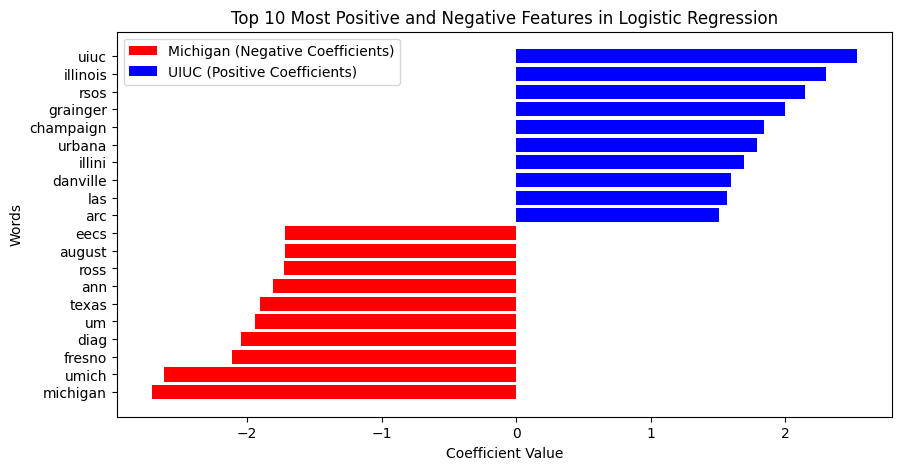

In [279]:
plt.figure(figsize=(10, 5))
plt.barh(top_negative_words, top_negative_coefs, color='red', label="Michigan (Negative Coefficients)")
plt.barh(top_positive_words, top_positive_coefs, color='blue', label="UIUC (Positive Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Words")
plt.title("Top 10 Most Positive and Negative Features in Logistic Regression")
plt.legend()
plt.show()

Most words are not very surpsising as a lot of them are locations at each of the campuses. A word that surprised me was "fries" because it makes me wonder why its being said a lot in relation to UMICH, some further investigation could be done to figure out the context of this.

In [280]:
feature_names = vectorizer.get_feature_names_out()
coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': model.coef_[0]})

# coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

In [281]:
top_10_negative

,feature,coefficient
4363,eecs,-1.717494
968,august,-1.720957
12167,ross,-1.727888
569,ann,-1.804486
14245,texas,-1.903070
14891,um,-1.939242
3736,diag,-2.048534
5483,fresno,-2.113276
14898,umich,-2.619890
8963,michigan,-2.707681


In [282]:
top_10_positive

,feature,coefficient
14871,uiuc,2.531196
7109,illinois,2.303569
12210,rsos,2.144820
5941,grainger,1.998430
2191,champaign,1.845696
15170,urbana,1.787604
7104,illini,1.694398
3386,danville,1.600747
8068,las,1.568379
737,arc,1.507656


In [283]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

Yes these words make sense because a lot of these are locations on campus and there are specfic to UIUC's campus, like grainger and green.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

I could not figure out how to download Gensim without getting errors so I used Scikit-learn’s Latent Dirichlet Allocation (LDA) instead.

In [300]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [301]:
nlp = spacy.load("en_core_web_sm")

In [302]:
uiuc_data = data[data["label"] == 1]  # Use only UIUC subreddit data

In [303]:
def preprocess(text):
    doc = nlp(text.lower())  # Convert to lowercase and tokenize
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(tokens)  # Join tokens back into a single string for CountVectorizer


In [304]:
uiuc_data["processed_text"] = uiuc_data["cleaned_text"].astype(str).apply(preprocess)

/var/folders/2v/k9lf44xj6kg_777zq36tcfv00000gn/T/ipykernel_1254/2027379370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uiuc_data["processed_text"] = uiuc_data["cleaned_text"].astype(str).apply(preprocess)


In [305]:
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

LatentDirichletAllocation(random_state=42)

In [306]:
feature_names = vectorizer.get_feature_names_out()
print("\nTop Words in Each Topic:")
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]  # Get top 10 words
    print(f"Topic {topic_idx + 1}: {top_words}")


Top Words in Each Topic:
Topic 1: ['the', 'for', 'is', 'of', 'to', 'and', 'that', 'they', 'are', 'in']
Topic 2: ['you', 'thank', 'thanks', 'the', 'is', 'for', 'that', 'deleted', 'this', 'in']
Topic 3: ['the', 'to', 'of', 'and', 'is', 'it', 'that', 'in', 'they', 'not']
Topic 4: ['to', 'you', 'and', 'the', 'of', 'in', 'for', 'that', 'is', 'your']
Topic 5: ['the', 'to', 'you', 'of', 'and', 'in', 'are', 'is', 'that', 'for']
Topic 6: ['you', 'to', 'if', 'for', 'the', 'it', 'can', 'me', 'have', 'and']
Topic 7: ['and', 'the', 'to', 'was', 'my', 'it', 'of', 'in', 'that', 'but']
Topic 8: ['the', 'to', 'of', 'you', 'on', 'is', 'in', 'be', 'it', 'at']
Topic 9: ['the', 'and', 'to', 'in', 'you', 'on', 'at', 'bus', 'of', 'there']
Topic 10: ['the', 'and', 'to', 'it', 'is', 'in', 'but', 'you', 'for', 'my']


These words do not provide any meaningful information as to what the topic could actually be since they are mainly filler words.

In [310]:
# Step 1: Fit CountVectorizer on ALL UIUC Data to ensure consistent vocabulary
vectorizer = CountVectorizer(max_features=5000, stop_words="english")  
X = vectorizer.fit_transform(uiuc_data["processed_text"])  # Fit and transform at the same time

# Step 2: Train LDA on X (Bag of Words representation)
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)  # Train LDA on the fitted vectorized data

# Step 3: Ensure X and topic_distributions use the same vectorizer
topic_distributions = lda.transform(X)  # Transform using the same X (no refitting vectorizer)

# Step 4: Assign dominant topics
uiuc_data["dominant_topic"] = topic_distributions.argmax(axis=1)


/var/folders/2v/k9lf44xj6kg_777zq36tcfv00000gn/T/ipykernel_1254/1282270879.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uiuc_data["dominant_topic"] = topic_distributions.argmax(axis=1)


In [311]:
print("\nSample Comments for Each Topic:")
for topic in range(num_topics):
    print(f"\nTopic {topic+1}:")
    print(uiuc_data[uiuc_data["dominant_topic"] == topic]["cleaned_text"].sample(3, random_state=42).tolist())



Sample Comments for Each Topic:

Topic 1:
['many online masters programs dont require previous background', 'basicneedsillinoisedu httpsodosillinoiseducommunityofcarebasicneeds', 'an exclamation point is sometimes used in the english language for emphasis hope this helps']

Topic 2:
['i saw one like that in a parking space ', 'thats a good idea ', 'a stray would not have a collar she is someones pet do take her to see if microchipped']

Topic 3:
['almost as lame as using one word to shoot down an entire argument as if one is being clever', 'im an old who would love to sing some weezer tunes but skibidi rizz i hope you find some bandmates to rock with i recommend susanne in the garage and the british are coming', 'hi']

Topic 4:
['my husband just bought fresh lime leaves at fresh international', 'deliver to your committee members and you will have smooth sailing ', 'cool ill just get out of my wheelchair or put down my walker and lift it up']

Topic 5:
['im quite literally under the dr

It is really hard to figure out what each topic actually is because all the comments within each topic differ a great deal since they talk about different things. Even the top words within each topic did not tell us much or give us any useful insights.